In [1]:
import numpy as np
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import DWModels as MD
import Preprocess as ps
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch
import mlflow
import mlflow.pytorch
import Preprocess as ps
from sklearn.model_selection import train_test_split
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset
import os
import warnings
import sys
import pandas as pd
import numpy as np
import numpy as np
import torch
from urllib.parse import urlparse
import torch.nn.functional as F
from torch import nn
import pandas as pd
import DWModels as MD
import Preprocess as ps
import tqdm
import logging
from collections import Counter
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
import ML_train as tr

In [2]:
data = pd.read_csv('datasets/train_dataset.csv')
p = ps.preprocess()

In [3]:
categorial_col = ["product_age_group","device_type","partner_id", "audience_id",
                  "product_gender","product_category(1)",
                 "product_country","day_time_category"]
numerical_col = ["nb_clicks_1week"]
#numerical_col = []
data = pd.read_csv('datasets/train_dataset.csv')
p = ps.preprocess()
y,X,column_idx,embeddings_input,cont_cols = p.prepro_train(data)
df = pd.DataFrame()
df[categorial_col+numerical_col] = X
df["Sale"] = y

In [4]:
y,X,column_idx,embeddings_input,cont_cols = p.prepro_train(data)
mlp_hidden_dims=[500,400,300,200, 100, 100]
column_idx=column_idx
embed_input=embeddings_input
mlp_dropout=[0.2,0.3,0.2,0.2,0.2,0.2]
continuous_cols=cont_cols
mlp_batchnorm=True
pred_dim = 2
model = MD.TabMlp(
mlp_hidden_dims=mlp_hidden_dims,
column_idx=column_idx,
embed_input=embeddings_input,
mlp_dropout=mlp_dropout,
continuous_cols=continuous_cols,
mlp_batchnorm=mlp_batchnorm,
pred_dim = pred_dim)
X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42,
                                                shuffle=True)



In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset


X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42,
                                                shuffle=True)


In [6]:
from collections import Counter
count=Counter(y_train)
 
class_count=np.array([count[0],count[1]])
 
weight=1./class_count
print(weight)
samples_weight = np.array([weight[int(t)] for t in y_train])
samples_weight = torch.from_numpy(samples_weight)
sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight))

[1.54561894e-05 9.70779536e-05]


In [7]:
train_subset = torch.utils.data.TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
val_subset = torch.utils.data.TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))

In [8]:

loss_function = nn.CrossEntropyLoss()
BATCH_SIZE = 256

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
model.to(device);
print(torch.cuda.is_available())

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

NUMBER_OF_EPOCHS = 22
train_loader = DataLoader(dataset=train_subset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(dataset=val_subset, shuffle=False, batch_size=BATCH_SIZE)

False


In [9]:
tr.training(model,optimizer,loss_function,train_loader,val_loader,NUMBER_OF_EPOCHS,device,scheduler)

epoch 0 - train Loss: 1.567e+02 - train Acc: 65.59%: 100%|█| 293/293 [00:22<00:0
epoch 0 - val Loss: 6.098e-01 - val Acc: 64.67%: 100%|█| 98/98 [00:01<00:00, 64.
epoch 1 - train Loss: 1.489e+02 - train Acc: 68.50%: 100%|█| 293/293 [00:23<00:0
epoch 1 - val Loss: 5.870e-01 - val Acc: 64.86%: 100%|█| 98/98 [00:01<00:00, 50.
epoch 2 - train Loss: 1.455e+02 - train Acc: 69.12%: 100%|█| 293/293 [00:22<00:0
epoch 2 - val Loss: 5.863e-01 - val Acc: 67.33%: 100%|█| 98/98 [00:01<00:00, 54.
epoch 3 - train Loss: 1.435e+02 - train Acc: 69.87%: 100%|█| 293/293 [00:22<00:0
epoch 3 - val Loss: 6.220e-01 - val Acc: 55.72%: 100%|█| 98/98 [00:02<00:00, 45.
epoch 4 - train Loss: 1.422e+02 - train Acc: 69.92%: 100%|█| 293/293 [00:23<00:0
epoch 4 - val Loss: 6.128e-01 - val Acc: 63.26%: 100%|█| 98/98 [00:01<00:00, 59.
epoch 5 - train Loss: 1.403e+02 - train Acc: 70.48%: 100%|█| 293/293 [00:19<00:0
epoch 5 - val Loss: 6.035e-01 - val Acc: 71.20%: 100%|█| 98/98 [00:01<00:00, 65.
epoch 6 - train Loss: 1.397e

KeyboardInterrupt: 

In [10]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
model.eval()
xt = torch.Tensor(X_test)
xt = xt.to(device)
t = model(xt)
predicted = torch.max(t.data,1)[1]
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
f1_score(predicted.cpu(), y_test)

0.33854721153058714

f1_score  is :0.33854721153058714%
recall_score  is :0.6151785714285715%
precision_score  is :0.23353293413173654%
              precision    recall  f1-score   support

     class 0       0.92      0.69      0.79     21640
     class 1       0.23      0.62      0.34      3360

    accuracy                           0.68     25000
   macro avg       0.58      0.65      0.56     25000
weighted avg       0.83      0.68      0.73     25000



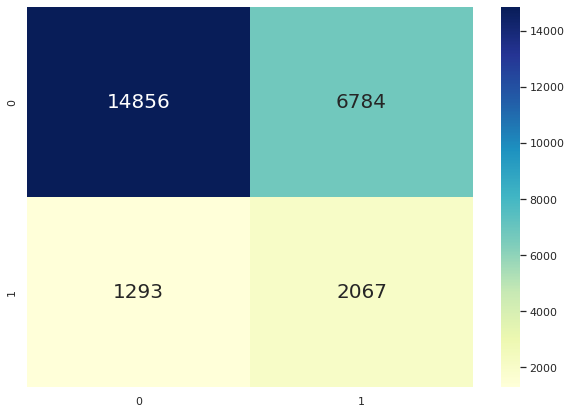

In [12]:
import torch
from torch import nn
import pandas as pd
import sklearn
import numpy as np
from sklearn.utils import shuffle
import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset
def visualize_result(y_true,y_pred):
  cm = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cm, range(2), range(2))
  plt.figure(figsize=(10,7))
  sn.set(font_scale=1) 
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 20},fmt="d",cmap="YlGnBu") # font size
  from sklearn.metrics import classification_report
  from sklearn.metrics import f1_score,recall_score,precision_score
  target_names = ['class 0', 'class 1']
  print("f1_score "+" is :{}%".format(f1_score(y_true=y_true , y_pred= y_pred)))
  print("recall_score "+" is :{}%".format(recall_score(y_true=y_true , y_pred= y_pred)))
  print("precision_score "+" is :{}%".format(precision_score(y_true=y_true , y_pred= y_pred)))
  print(classification_report(y_true, y_pred, target_names=target_names))
visualize_result(y_test,predicted.cpu())

In [13]:
torch.save(model, f"models/droped{np.round(f1_score(predicted.cpu(), y_test),4)}")

In [15]:
for changing_col in categorial_col+numerical_col:
    final = pd.DataFrame()
    final[categorial_col+numerical_col] = X_test
    cols = categorial_col+numerical_col
    cols.remove('nb_clicks_1week')
    final[cols] = final[cols].astype(int)
    final['nb_clicks_1week'] = final['nb_clicks_1week'].astype(float)
    final[changing_col] = 0
    model.eval()
    xt = torch.Tensor(final.to_numpy())
    xt = xt.to(device)
    t = model(xt)
    predicted = torch.max(t.data,1)[1]
    from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
    print(f'{changing_col} : {f1_score(predicted.cpu(), y_test)}')

product_age_group : 0.3391403451644415
device_type : 0.3107904642409034
partner_id : 0.28240091754810753
audience_id : 0.32421909565525175
product_gender : 0.33806515139082627
product_category(1) : 0.3396414342629482
product_country : 0.33819195539625646
day_time_category : 0.34256375725948995
nb_clicks_1week : 0.33776091081593923
